### Q1 Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore, ttest_ind, mannwhitneyu, chisquare, levene, f_oneway

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Q2 Read the data as a data frame

In [2]:
insurance_df = pd.read_csv ('C:/Users/kulkarni1/Documents/AIMLWorkspace/Databases/insurance.csv')

### Q3.a Shape of the data

In [3]:
print ('Shape of the data: ', insurance_df.shape)

Shape of the data:  (1338, 7)


### Q3.b Data type of each attribute

In [4]:
print ('Datatypes of the columns\n', insurance_df.dtypes)

Datatypes of the columns
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### Q3.c Checking the presence of missing values

In [5]:
# Pandas recognize Empty and "NA" as missing values. This is checked by isnull() function
print ('Check if any values are NULL: ', insurance_df.isnull().values.any())

Check if any values are NULL:  False


### Q3.d 5 point summary of numerical attributes

In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Q3.e Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

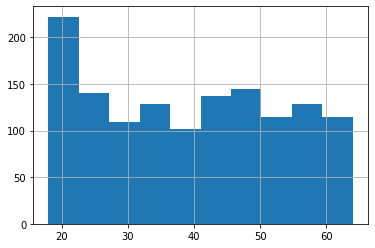

In [7]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10))
#plt.show()

insurance_df['age'].hist()
#sns.countplot(x='age', data=insurance_df)

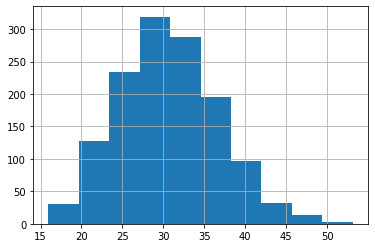

In [8]:
insurance_df['bmi'].hist()

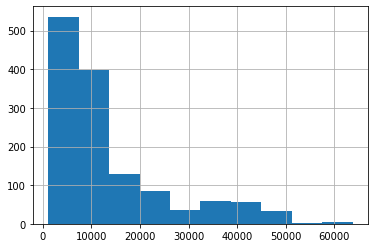

In [9]:
insurance_df['charges'].hist()

### Q3.f Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [10]:
insurance_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Applying Bulmer's rule to interpret the skewnees:
- The skewness for age and bmi are within -0.5  and 0.5. The distribution is approximately symmetric
- The skewnees for children is 0.94, which is close to 1. The distribution is moderately skewed.
- The skewness for charges is 1.51, which is more than 1. The distribution is highlyt skewed.

In [11]:
#cols = insurance_df.select_dtypes (include=[np.number])
#cols = cols.apply (zscore)

insurance_z = insurance_df[['age', 'bmi', 'charges']].copy()
insurance_z['age_z'] = zscore(insurance_df['age'])
insurance_z['bmi_z'] = zscore(insurance_df['bmi'])
insurance_z['charges_z'] = zscore(insurance_df['charges'])

### Q3. g Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns
Outliers are checked from the BoxPlot and the Zscore (>1.5 of IQR)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
11,62,female,26.290,0,yes,southeast,27808.72510
22,18,male,34.100,0,no,southeast,1137.01100
26,63,female,23.085,0,no,northeast,14451.83515
31,18,female,26.315,0,no,northeast,2198.18985
33,63,male,28.310,0,no,northwest,13770.09790
36,62,female,32.965,3,no,northwest,15612.19335
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
57,18,male,31.680,2,yes,southeast,34303.16720


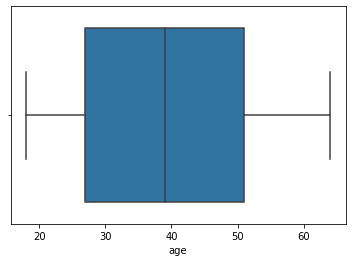

In [12]:
#Checking the presence of outliers for age
sns.boxplot (x=insurance_z['age'])
insurance_df[abs(insurance_z['age_z']) > 1.5]

,age,sex,bmi,children,smoker,region,charges
13,56,female,39.820,0,no,southeast,11090.71780
14,27,male,42.130,0,yes,southeast,39611.75770
18,56,male,40.300,0,no,southwest,10602.38500
28,23,male,17.385,1,no,northwest,2775.19215
35,19,male,20.425,0,no,northwest,1625.43375
37,26,male,20.800,0,no,southwest,2302.30000
39,60,male,39.900,0,yes,southwest,48173.36100
83,48,female,41.230,4,no,northwest,11033.66170
98,56,male,19.950,0,yes,northeast,22412.64850
99,38,male,19.300,0,yes,southwest,15820.69900


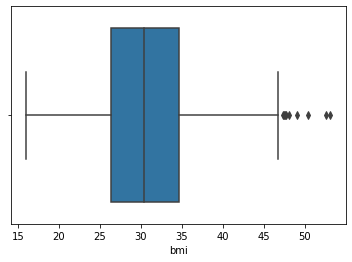

In [13]:
#Checking the presence of outliers for bmi
sns.boxplot (x=insurance_z['bmi'], whis=1.5)
insurance_df[abs(insurance_z['bmi_z']) > 1.5]

,age,bmi,charges,age_z,bmi_z,charges_z
14,27,42.130,39611.75770,-0.869155,1.881033,2.175983
19,30,35.300,36837.46700,-0.655551,0.760609,1.946807
23,34,31.920,37701.87680,-0.370746,0.206139,2.018214
29,31,36.300,38711.00000,-0.584350,0.924654,2.101574
30,22,35.600,35585.57600,-1.225161,0.809822,1.843392
34,28,36.400,51194.55914,-0.797954,0.941058,3.132806
38,35,36.670,39774.27630,-0.299545,0.985350,2.189409
39,60,39.900,48173.36100,1.480485,1.515214,2.883233
49,36,35.200,38709.17600,-0.228344,0.744205,2.101424
53,36,34.430,37742.57570,-0.228344,0.617890,2.021576


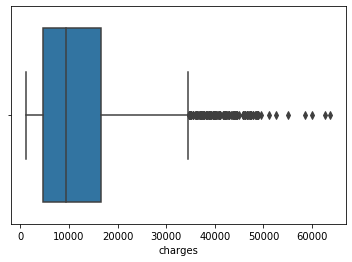

In [14]:
#Checking the presence of outliers for charges
sns.boxplot (x=insurance_z['charges'])
insurance_z[abs(insurance_z['charges_z']) > 1.5]

### Q3.h Distribution of categorical columns (include children)
Distribution of Categorical columns is shown by CountPlot

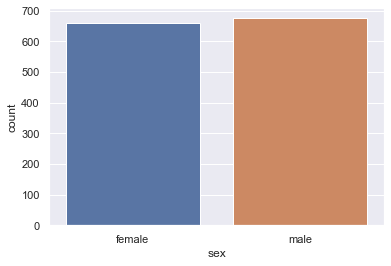

In [15]:
sns.set (style="darkgrid")
sns.countplot(x='sex', data=insurance_df)

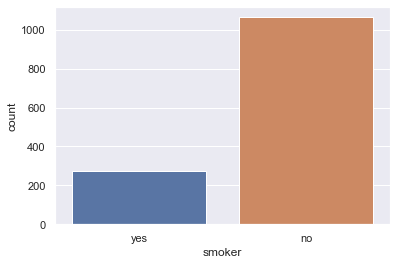

In [16]:
sns.countplot(x='smoker', data=insurance_df)

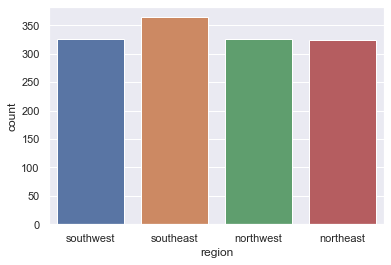

In [17]:
sns.countplot(x='region', data=insurance_df)

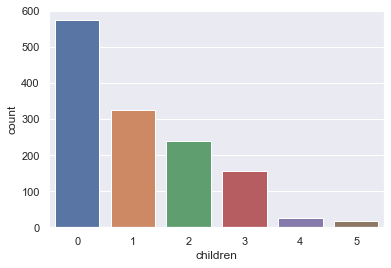

In [18]:
sns.countplot(x='children', data=insurance_df)

### Q3.i Pair plot that includes all the columns of the data frame

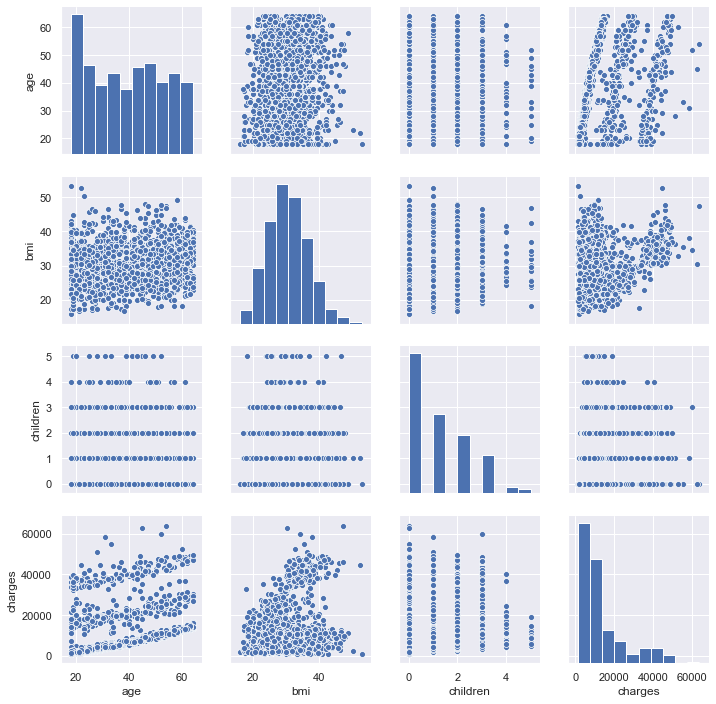

In [19]:
sns.pairplot (insurance_df)

### Q4.a Do charges of people who smoke differ significantly from the people who don't ?

First plotting the scatter plot for the charges for smokers and non-smokers

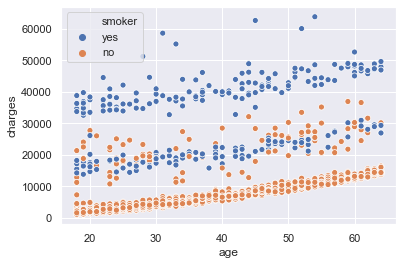

In [20]:
sns.scatterplot (x=insurance_df['age'], y=insurance_df['charges'], hue=insurance_df['smoker'])

Then, grouping the charges for smokers and non-smokers

In [21]:
insurance_df.groupby (['smoker']).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


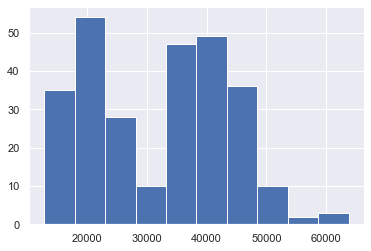

In [22]:
# Getting the Charges for Smokers and non-Smokers by a filter
smoke_filter = insurance_df.apply (lambda row: (row['smoker'] == 'yes'), axis=1)
charges_smoker = (insurance_df[smoke_filter])['charges']
charges_no_smoker = (insurance_df[~smoke_filter])['charges']

charges_smoker.hist()

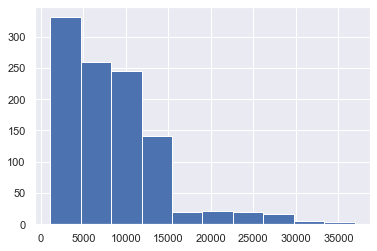

In [23]:
charges_no_smoker.hist()

### Based on the histograms the smoker and non_smoker charges, don't seem to be normally distributed 
### ttest_ind may not be apprropriate and Mann-Whitneyu test is carried out to check different populations

Conducting Mann-Whitneyu test to check if the two non-parametric populations are significantly different

Null Hypothesis: Charges for people who smoke are DO NOT differ significantly than from the people who don't smoke

Alternative Hypothesis: Charges for people who smoke are differ significantly than from the people who don't smoke

Level of significant error: 0.05

In [24]:
# Conducting two-sample ttest for independent population (assuming underlying normal distribution for charges)
#t_statistic, p_value = ttest_ind (charges_no_smoker, charges_smoker)
#print('p_value for two-sample t-test for independent population: ', p_value)

# However, the underlying population for "charges" doesn't seem to be normally distributed
# So, conducting Mann-Whitney test
mannwhitneyu (charges_smoker, charges_no_smoker)

MannwhitneyuResult(statistic=7403.0, pvalue=2.6351167222517853e-130)

Here, p_value almost close to Zero in MannWhitney test

So, the Null Hypothesis is Rejected and Alternative Hypothesis is Accepted

### Charges for the people who smoke are differ significantly than from the people who don't smoke

### Q4.b Does bmi of males differ significantly from that of females ?

First plotting the scatter plot for the bmi for males and females

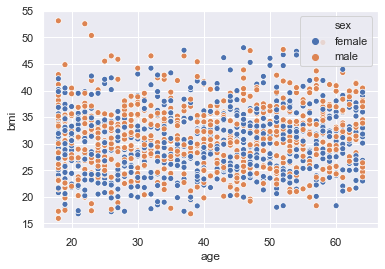

In [25]:
sns.scatterplot (x=insurance_df['age'], y=insurance_df['bmi'], hue=insurance_df['sex'])

Then, grouping the bmi for male and female

In [26]:
insurance_df.groupby (['sex']).mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [27]:
# Getting the bmi distribution for male and female by a filter
gender_filter = insurance_df.apply (lambda row: (row['sex'] == 'male'), axis=1)
bmi_male = insurance_df[gender_filter]['bmi']
bmi_female = insurance_df[~gender_filter]['bmi']

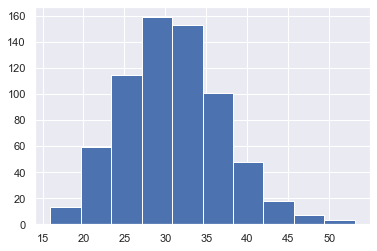

In [28]:
bmi_male.hist()

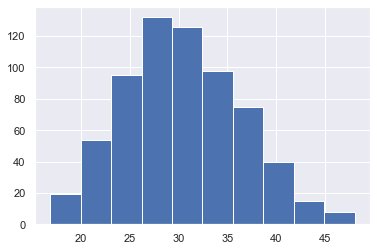

In [29]:
bmi_female.hist()

### From the above histograms, bmi for male and female resembles normal distribution
### Two-sample ttest_ind is appropriate to check different populations

Conducting Two-sample ttest_ind to check if two populations are significantly different

Null Hypothesis: BMI for male DO NOT differ significantly than from female

Alternative Hypothesis: BMI for male differ significantly than from female

Level of significant error: 0.05

In [30]:
# Conducting two-sample t-test for independent population (assuming underlying normal distribution for bmi)
t_statistic, p_value = ttest_ind (bmi_male, bmi_female)
print('p_value for two-sample t-test for independent population: ', p_value)

p_value for two-sample t-test for independent population:  0.08997637178984932


Here, p_value 0.089 > 0.05 the level of significant error

So, the Null Hypothesis is NOT Rejected and Alternative Hypothesis is Rejected

### BMI for male DO NOT differ significantly than from female

## Q4.c Is the proportion of smokers significantly different in different genders?
### This is Chi-squared test to compare the categorical responses between the two independent groups (Gender v/s Smoker)

One sided Chi-squared test of independence of proportions:

Null Hypothesis: No significant difference in the proportion of smokers in different genders

Alternative Hypothesis: Significant difference in the proportion of smokers in different genders

Level of Significant error: 0.05

In [31]:
# Creating Two-way Contingency table with sex and smoker columns
two_way = pd.crosstab (insurance_df.sex, insurance_df.smoker)
two_way

smoker,no,yes
sex,,
female,547,115
male,517,159


In [32]:
# Computing the Chi-square test statics and p_value for smoker
chisquare(two_way['yes'])

Power_divergenceResult(statistic=7.065693430656935, pvalue=0.007857389588994759)

Here, p_value 0.00786 < 0.05, level of significance error

So, the Null Hypothesis is Rejected and Alternative Hypothesis is Accepted

### Significant difference between the proportions of smokers in different genders

### Q4.d Is the distribution of bmi across women with no children, one child and two children, the same ?

In [33]:
# Getting the distribution for zero, one and two children
zero_child = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 0)]['bmi']
one_child = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 1)]['bmi']
two_child = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 2)]['bmi']

#f_oneway (zero_child, one_child, two_child)
print ('Input Means: ', np.mean(zero_child), np.mean(one_child), np.mean(two_child))
print ('Input Variances: ', np.var(zero_child), np.var(one_child), np.var(two_child))

Input Means:  30.361522491349486 30.05265822784811 30.64978991596637
Input Variances:  35.481105813507966 33.2754679338247 43.5638493256126


Before conducting ANOVA, first find out if all the population have equal variance by Levene Test

For one-sided Levene Test:

Null Hypothesis: All variances are equal

Alternative Hypothesis: Atleast one of the variances not equal

Level of significance of error: 5%

In [34]:
levene (zero_child, one_child, two_child)

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

Here, p_value 0.3899 > 0.05 level of significance error

So, the Null Hypothesis is NOT Rejected

### All Variances of the three groups are equal. It is OK to proceed with ANOVA test

For One-tailed ANOVA test:

Null Hypothesis: No significant difference among means of three groups

Alternative Hypothesis: Significance difference between the means of at least one pair of groups

For one-tailed test, level of significance Error: 5%

In [35]:
f_oneway (zero_child, one_child, two_child)

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

Here, p_value 0.71585 > 0.05 level of significance error

So, the Null Hypothesis is NOT Rejected

### No significant difference among the means of three groups

### Based on the Levene and ANOVA test results, it is concluded that the distribution of bmi across women with no, one and two children are same